In [5]:
#function with imports and preprcessing
def preprocessing(inp):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.compose import make_column_selector as selector
    from sklearn.compose import make_column_transformer 
    from sklearn.compose import ColumnTransformer
    
    df_original=pd.read_csv(inp)
    df_new=df_original.drop(columns=['case:concept:name','case:deadline','case:enddate','case:enddate_planned','case:startdate'])
    pd.set_option('mode.chained_assignment', 'warn')
    
    aa='time:timestamp'
    for i in enumerate(df_new["time:timestamp"]):
        a=df_new["time:timestamp"][i[0]]
        df_new.loc[i[0],"time:timestamp"]=pd.Timestamp(a).timestamp()
    
    df_ohe = df_new

    categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
    numerical_preprocessor = StandardScaler()

    numerical_columns_selector = selector(dtype_exclude=object)
    categorical_columns_selector = selector(dtype_include=object)

    numerical_columns = numerical_columns_selector(df_ohe)
    categorical_columns = categorical_columns_selector(df_ohe)

    preprocessor = ColumnTransformer([
        ('one-hot-encoder', categorical_preprocessor, categorical_columns),
        ('standard_scaler', numerical_preprocessor, numerical_columns)])

    preprocessor.fit(df_ohe)
    X1= preprocessor.transform(df_ohe)

    transformer = make_column_transformer(
        (OneHotEncoder(sparse_output=False), ['case:channel','case:department','case:group','case:responsible','concept:instance','concept:name','lifecycle:transition','org:group','org:resource']),
        remainder='passthrough')
    


    transformed = transformer.fit_transform(df_ohe)
    df_ohe = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

    df_ohe.head()
    return df_ohe
    

In [6]:
df_ohe=preprocessing('receipt.csv')

In [7]:
def isolation_forest(inp):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib
    import matplotlib.pyplot as plt
    from sklearn.ensemble import IsolationForest
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    iForest=IsolationForest(n_estimators=100,contamination=0.01,bootstrap=False)
    df_woutnan=inp
    iForest.fit(df_woutnan)
    
    y_pred=iForest.predict(df_woutnan)
    y_score=iForest.score_samples(df_woutnan)
    df_woutnan_with_anomaly_label_IsolationForest=df_woutnan
    df_woutnan_with_anomaly_label_IsolationForest['anomaly_label']=y_pred
    df_woutnan_with_anomaly_label_IsolationForest['anomaly_score']=y_score
    
   
    %matplotlib inline
    outliers=df_woutnan_with_anomaly_label_IsolationForest.loc[df_woutnan_with_anomaly_label_IsolationForest.anomaly_label==-1]
    outlier_index=list(outliers.index)

    pca=PCA(3)
    pca.fit(df_woutnan_with_anomaly_label_IsolationForest)
    res=pd.DataFrame(pca.transform(df_woutnan_with_anomaly_label_IsolationForest))

    b1=plt.scatter(res[0],res[1],c='gray',s=20,label="normal")
    b1=plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1],c='red',s=20,edgecolor="red",label="outliers")
    plt.legend(loc="upper right")
    plt.show()
    
    return plt.show()

C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


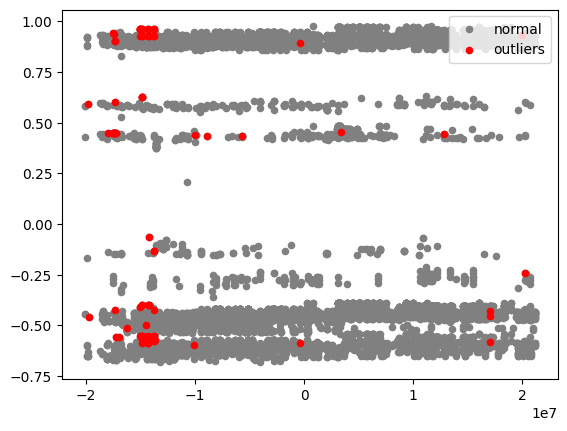

In [8]:
isolation_forest(df_ohe)